# Introduction - need to complete this

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. This will be done in 3 stages:
1. The data will be gathered from various sources.
2. The data will be visually and programatically assessed.
3. The data will be programatically cleaned

After these steps, insights will be extracted from the resulting clean data.

# Gathering data

At this data wrangling stage, we will be collecting datasets from various sources and preparing them for cleaning and analysis by reading them into individual Pandas DataFrames.

The datasets are as follows:<br>
**Twitter archive**: This csv file is provided by the instructor as "file on hand". It will be placed in the project directory.

**Tweet image predictions**: This tsv file is hosted on Udacity's servers and will have to be downloaded programmatically into the notebook.

**Retweet count and favorite count**: This json data will be acquired from the WeRateDogs Twitter handle using Twitter's API.

In [1]:
# Importing the required packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Reading the WeRateDogs Twitter archive file into DataFrame
arch = pd.read_csv('twitter-archive-enhanced.csv')
arch.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# Downloading the image predictions file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [3]:
# Reading the TSV file into a DataFrame
img_pred = pd.read_csv('image-predictions.tsv', sep='\t' )
img_pred.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [ ]:
# Querying Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# List of dictionaries to read JSON data
dict_list = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        load = json.loads(line)        
        dict_list.append({'tweet_id': load['id'],
                          'retweet_count': load['retweet_count'],
                          'favorite_count': load['favorite_count'],
                         })

In [5]:
# Creating a DataFrame with tweet ID, retweet count, and favorite count
api_data = pd.DataFrame(dict_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
api_data.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


# Assessing Data

At this stage, these DataFrames will be assessed visually and programmatically for quality and tidiness issues.

In [6]:
arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


_Column descriptions_ - most of these are taken from [Twitter developer docs](]https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html). Some of them are implied from the name, and others are specific to the WeRateDogs Twitter archive.<br><br>
**in_reply_to_status_id**:  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.<br>
**in_reply_to_user_id**:  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet. <br>
**timestamp**: The date/time of the tweet being posted.<br>
**source**: Utility used to post the Tweet, as an HTML-formatted string.<br>
**text**: The actual UTF-8 text of the status update.<br>
**expanded_urls**:	The full URL of the tweet.<br><br>
The following columns are only populated for retweets:<br>
**retweeted_status_id**<br>
**retweeted_status_user_id**<br>
**retweeted_status_timestamp**<br><br>

The following columns are specific to the WeRateDogs archive:<br>
**rating_numerator**: The rating given to the dog in the image. This is always higher than 10, because ["they're good dogs"](https://knowyourmeme.com/memes/theyre-good-dogs-brent).<br>
**rating_denominator**: This is always 10. <br>
**name**: Name of the dog in the post.<br>
The following 4 columns indicate the "stage" of the dog [according to The Dogtionary (via the #WeRateDogs book on Amazon)](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png):<br>
**doggo**, **floofer**, **pupper**, **puppo**

In [8]:
arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None


In [9]:
arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
arch.tweet_id.duplicated().sum()

0

In [11]:
arch.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [7]:
# Since a number of likely-incorrect names are lower-case above, taking a closer look at these.
arch.loc[(arch.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [114]:
arch.query('rating_denominator == 20 | rating_denominator == 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


Some of these posts have usable content that has been incorrectly extracted.

In [8]:
arch.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [46]:
arch.rating_numerator.sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [9]:
arch.query('rating_numerator < 10 or rating_numerator > 14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


In [10]:
arch.query('name == "None" & rating_numerator > 14 or rating_numerator < 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [11]:
arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


_Column descriptions_<br>
**tweet_id**: is the last part of the tweet URL after "status/".<br>
**p1**: the algorithm's #1 prediction for the image in the tweet.<br>
**p1_conf**: how confident the algorithm is in its #1 prediction.<br>
**p1_dog**: whether or not the #1 prediction is a breed of dog.<br>
**p2**: the algorithm's second most likely prediction.<br>
**p2_conf**: how confident the algorithm is in its #2 prediction.<br>
**p2_dog**: whether or not the #2 prediction is a breed of dog.<br>
etc.

In [40]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1704,817415592588222464,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True


In [11]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
img_pred.jpg_url.duplicated().sum()

0

In [9]:
api_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


_Column descriptions_<br>
**tweet_id**: the last part of the tweet URL after "status/".<br>
**retweet_count**: the number of times the tweet has been retweeted.<br>
**favorite_count**: the number of times the tweet has been favorited.<br>

In [45]:
api_data.sample(5)

,tweet_id,retweet_count,favorite_count
1921,674082852460433408,186,804
1596,686035780142297088,138,1274
948,752173152931807232,2106,6569
1311,706904523814649856,8830,15961
575,800859414831898624,113,778


In [22]:
api_data.tweet_id.duplicated().sum()

0

In [13]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
api_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [6]:
api_data.tweet_id.duplicated().sum()

0

## Issues found

### Quality
**WeRateDogs Twitter archive**
1. Columns have different value-counts. For example, expanded_urls column has 2297 records while others have 2356 records.
2. Since we are looking for original tweets only, the 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id' and 'in_reply_to_user_id' columns should be null.
3. There is no way to ensure that each tweet has an image attached. The image_pred file contains this information, and may be useful.
4. 'timestamp' is in string (object) format. 
5. Since the ratings are all out 10 points, the 'rating_denominator' column is not required. Furthermore, some items have been read into ratings which are not meant to be so (for example, "4/20", "9/11", and "7/11").
6. Ratings numerator has values below 10 (which is incorrect based on the page's unique rating mechanism). Furthermore, ratings above 14 appear to be uncommon and possibly mistakes due to typing errors.
7. Name column has incorrect values. For instance, examples of some 'Name' column values with 'None': `tweet ID 667509364010450000` is Tickles, `tweet ID 668142349051129000` is Oliver, `tweet ID 677918531514703000` is Reese, but has an apostrophe.<br><br>

**Image Prediction file**
8. There are duplicates in the jpg_url column.

### Tidiness
1. **WeRateDogs Twitter archive**: Dog stages are classified in separate columns, breaking the 'each variable forms a column' rule of tidy data.
2. **Twitter API data**: This data is meaningless by itself. It can be combined with one of the other DataFrames to be add value to the dataset as a whole and for it to be considered tidy

# Cleaning Data

Finally, we will address the issues we've identified above. The process we will use is: 
1. Create a copy of the DataFrames.
2. Define a data cleaning plan by converting our notes above to cleaning tasks.
3. Code the cleaning tasks defined above.
4. Test: Use assessment functions to ensure that the changes were made correctly.

In [13]:
# Creating DataFrame copies to use for cleaning tasks
arch_clean = arch.copy()
api_data_clean = api_data.copy()
img_pred_clean = img_pred.copy()

## Task definitions (Data cleaning plan)
1. Drop duplicates from the image prediction's jpg_url column, and join the jpg_url column from the image prediction file and the Twitter API data with the Twitter archive on the tweet ID column.
2. Change rating numerator for tweet IDs 757596066325864448 (most likely a typo) and 883482846933004288 (rounding up the 13.5 found in original tweet) to 14.
3. Drop the rows that have null values in the Expanded URLs column and those that have no images.
4. Filter the retweets and replies out of the Twitter archive file. After that, drop the null columns.
5. Reduce dog stages to at most 1 per row and melt the dog stages into a column to describe dog stages.
6. Fix ratings
    1. Filter the dataset with rows where numerator > denominator.
    2. Drop the 'rating_denominator' column.
    3. Review ratings between 0 and 10 and above 14. Keep the ones that have usable information, and filter out the rest
7. Extract names from rows in Name column that start in lower-case.
8. Convert 'timestamp' column to datetime format.

**Define**

Delete duplicates from image prediction file's jpg_url column, and then join image link column (from image prediction DataFrame) and retweet and favorite counts (from the API file) to Twitter archive DataFrame.

**Code**

In [8]:
# Dropping duplicates from image preduction jpg_url column
img_pred_clean.jpg_url.drop_duplicates(inplace=True, keep='first')

In [9]:
# Joining the image link column to twitter archive df and dropping the rest of the columns
arch_clean = arch_clean.merge(img_pred_clean, how='left', on='tweet_id').drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [10]:
# Joining the API data to twitter archive df
arch_clean = arch_clean.merge(api_data_clean, how='left', on='tweet_id')

In [11]:
# Dropping the rows where retweet count is null
list=arch_clean[arch_clean.retweet_count.isnull()].index
np.array(list)
arch_clean.drop(labels=list, axis=0, inplace=True)

**Test**

In [12]:
# Confirming all the duplicates were dropped from the jpg_url column in the image prediction file
img_pred_clean.jpg_url.duplicated().sum()

0

In [13]:
# Testing to ensure the new arch_clean has 'jpg_url' and retweet and favorite count columns
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
jpg_url                       20

**Define**

Dropping rows that have nulls in arch_clean.expanded_urls.

**Code**

In [14]:
list=arch_clean[arch_clean.expanded_urls.isnull()].index
np.array(list)
arch_clean.drop(labels=list, axis=0, inplace=True)

**Test**

In [15]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2295 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2295 non-null object
source                        2295 non-null object
text                          2295 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2295 non-null int64
rating_denominator            2295 non-null int64
name                          2295 non-null object
doggo                         2295 non-null object
floofer                       2295 non-null object
pupper                        2295 non-null object
puppo                         2295 non-null object
jpg_url                       20

**Define**

Remove rows that do not have images attached from the dataset.

**Code**

In [16]:
list=arch_clean[arch_clean.jpg_url.isnull()].index
np.array(list)
arch_clean.drop(labels=list, axis=0, inplace=True)

**Test**

In [17]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

**Define**

Remove the Retweet and Reply columns, since they are not required in our analysis.

**Code**

In [18]:
# Filter by columns not required
arch_clean = arch_clean[(arch_clean.retweeted_status_id.isnull()) & (arch_clean.in_reply_to_status_id.isnull())]
# Dropping the columns not to be included in analysis
arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [19]:
arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774.0,41048.0


In [102]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 246.4+ KB


**Define**

Place all the dog stages into one column.

**Code**

In [20]:
# Change the 'None' values to null values, since the 'None' is a text value
dog_stage_cols = [arch_clean.doggo, arch_clean.puppo, arch_clean.pupper, arch_clean.floofer]
for x in dog_stage_cols:
    x.replace('None', np.nan, inplace=True)

In [21]:
arch_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853.0,39467.0


In [22]:
arch_clean['dog_stage'] = np.nan

In [23]:
arch_clean['dog_stage'] = arch_clean.doggo.fillna('').map(str) + arch_clean.floofer.fillna('').map(str) + arch_clean.pupper.fillna('').map(str) + arch_clean.puppo.fillna('').map(str)

In [24]:
arch_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

Since according to the Dogtionary, doggo and pupper can be used interchangeably (for dogs of different sizes), we will convert the 'doggopupper' values above to just 'pupper'. However, we will manually check the 'doggopuppo' and 'doggofloofer' values for the correct dog stage.

In [25]:
arch_clean.query('dog_stage == "doggofloofer" | dog_stage == "doggopuppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,retweet_count,favorite_count,dog_stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,19196.0,47844.0,doggopuppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,3433.0,17169.0,doggofloofer


According to the tweets, the dog marked as 'doggofloofer' is actually a floofer, meanwhile the dog marked as 'doggopuppo' is actually a 'puppo'. We will make these changes below:

In [26]:
arch_clean.dog_stage.replace('doggofloofer', 'floofer', inplace=True)
arch_clean.dog_stage.replace('doggopuppo', 'puppo', inplace=True)
arch_clean.dog_stage.replace('doggopupper', 'pupper', inplace=True)

In [27]:
# Dropping individual dog stage columns
arch_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)

In [28]:
arch_clean.dog_stage = arch_clean.dog_stage.astype('category')

In [29]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
jpg_url               1971 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
dog_stage             1971 non-null category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 186.9+ KB


**Test**

In [30]:
arch_clean.dog_stage.value_counts()

           1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

**Define**

Changing rating_numerator of tweet IDs `57596066325864448` and `883482846933004288`

In [31]:
# Querying for the indices of the tweet IDs
arch_clean[(arch_clean.tweet_id == 757596066325864448) | (arch_clean.tweet_id == 883482846933004288)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,dog_stage
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,10407.0,46860.0,
912,757596066325864448,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4,10,None,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1219.0,4808.0,


**Code**

In [32]:
arch_clean.loc[[912, 45], 'rating_numerator'] = 14

**Test**

In [33]:
arch_clean[(arch_clean.tweet_id == 757596066325864448) | (arch_clean.tweet_id == 883482846933004288)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,dog_stage
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,10407.0,46860.0,
912,757596066325864448,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,14,10,None,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1219.0,4808.0,


**Define**

Fix ratings
1. Filter the dataset with rows where numerator is between 11 and 14.
2. Only keep rows where denominator is 10.
3. Drop the 'rating_denominator' column.

**Code**

In [34]:
# Drop the rows where denominator > 10. Some rows have values such as 4/20 and 50/50 which have been misinterpreted as ratings
list=arch_clean[arch_clean.rating_denominator > 10].index
np.array(list)
arch_clean.drop(labels=list, axis=0, inplace=True)

In [35]:
# Only keep the rows where the numerator > denominator
arch_clean = arch_clean[arch_clean.rating_numerator > arch_clean.rating_denominator]

In [36]:
# Only keep the rows where the numerator is between 11 and 14
arch_clean = arch_clean[(arch_clean.rating_numerator > 10) & (arch_clean.rating_numerator < 15)]

**Test**

In [37]:
print("Numerators count: ",arch_clean.rating_numerator.value_counts(), "Denominators count: ",arch_clean.rating_denominator.value_counts())

Numerators count:  12    446
11    392
13    253
14     35
Name: rating_numerator, dtype: int64 Denominators count:  10    1126
Name: rating_denominator, dtype: int64


In [38]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 2339
Data columns (total 12 columns):
tweet_id              1126 non-null int64
timestamp             1126 non-null object
source                1126 non-null object
text                  1126 non-null object
expanded_urls         1126 non-null object
rating_numerator      1126 non-null int64
rating_denominator    1126 non-null int64
name                  1126 non-null object
jpg_url               1126 non-null object
retweet_count         1126 non-null float64
favorite_count        1126 non-null float64
dog_stage             1126 non-null category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 106.9+ KB


**Define**

Remove the rows where the name starts in lowercase

**Code**

In [39]:
# Remove rows where name starts in lowercase
arch_clean['name'] = arch_clean.name.str.extract(pat='([A-Z]\S*)')#.fillna('')
arch_clean = arch_clean[arch_clean.name.map(str) != 'None']
# arch_clean = arch_clean[arch_clean.valid_names != '' or arch_clean.valid_names != 'None']

In [40]:
# Removing rows where name is null
list=arch_clean[arch_clean.name.isnull()].index
np.array(list)
arch_clean.drop(labels=list, axis=0, inplace=True)

**Test**

In [41]:
arch_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
6            Jax
8           Zoey
9         Cassie
10          Koda
11         Bruno
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
23        Canela
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
33         Jimbo
34        Maisey
38          Earl
39          Lola
40         Kevin
43          Yogi
          ...   
2129      Sandra
2135        Liam
2137         Ben
2144       Andru
2154       Penny
2167      Saydee
2171        Kirk
2173        Ralf
2179      Tucker
2180    Terrance
2187        Chaz
2188      Jeremy
2193     Lambeau
2194     Ruffles
2195      Amélie
2196        Bobb
2200    Winifred
2213      Marvin
2217      Gòrdón
2221        DayZ
2225       Rusty
2228      Jareld
2234    Skittles
2244        Erik
2257       Olive
2270        Hall
2275     Cupcake
2283      Josh

In [42]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 2293
Data columns (total 12 columns):
tweet_id              821 non-null int64
timestamp             821 non-null object
source                821 non-null object
text                  821 non-null object
expanded_urls         821 non-null object
rating_numerator      821 non-null int64
rating_denominator    821 non-null int64
name                  821 non-null object
jpg_url               821 non-null object
retweet_count         821 non-null float64
favorite_count        821 non-null float64
dog_stage             821 non-null category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 78.0+ KB


**Define**

Change timestamp to datetime format.

**Code**

In [43]:
arch_clean['timestamp_dt'] = pd.to_datetime(arch_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

**Test**

In [44]:
arch_clean.dtypes

tweet_id                       int64
timestamp                     object
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
retweet_count                float64
favorite_count               float64
dog_stage                   category
timestamp_dt          datetime64[ns]
dtype: object

## Saving as flat file

In [2]:
arch_clean.to_csv('twitter_archive_master.csv', index=False)

NameError: name 'arch_clean' is not defined

## Analyzing data

In [2]:
# Reading the csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,dog_stage,timestamp_dt
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853.0,39467.0,NaN,2017-08-01 16:23:56
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514.0,33819.0,NaN,2017-08-01 00:17:27
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328.0,25461.0,NaN,2017-07-31 00:18:03
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964.0,42908.0,NaN,2017-07-30 15:58:51
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774.0,41048.0,NaN,2017-07-29 16:00:24


### Insight # 1: Percentage of each rating_numerator in the data set

In [3]:
pc = df.rating_numerator.value_counts(1)*100
pc.round(decimals=2)

12    39.71
11    36.66
13    21.44
14     2.19
Name: rating_numerator, dtype: float64

### Insight # 2: Times of day (hour:minute) for the top 10 posts by favorite_count

In [3]:
fav_count_sort = df.sort_values(by=['favorite_count'], ascending=False).head(10)

In [4]:
fav_and_timestamp = fav_count_sort[['favorite_count','timestamp_dt']]
fav_and_timestamp.timestamp_dt = fav_and_timestamp.timestamp_dt.str[-8:-3]

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
fav_and_timestamp.dtypes

favorite_count    float64
timestamp_dt       object
dtype: object

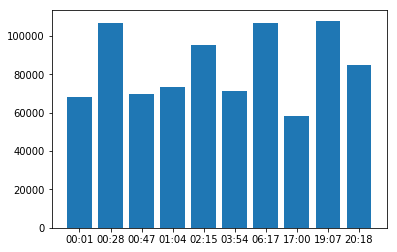

In [7]:
plt.bar(fav_and_timestamp.timestamp_dt, fav_and_timestamp.favorite_count);

### Insight # 3: Relationship between retweet_count and	favorite_count

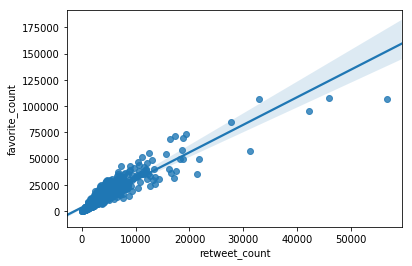

In [8]:
sb.regplot(data = df, x = 'retweet_count', y = 'favorite_count');

### Insight # 4: Average rating numerator by dog stage

In [20]:
df.groupby(by=df.dog_stage, axis=0).rating_numerator.mean().round(decimals=2)

dog_stage
doggo      12.39
floofer    12.00
pupper     11.61
puppo      12.33
Name: rating_numerator, dtype: float64

In [3]:
df.dog_stage.value_counts()

pupper     59
doggo      33
puppo      12
floofer     4
Name: dog_stage, dtype: int64